## Basic relationship plots

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the first .csv file

In [9]:
mdff = pd.read_csv("datasets/008TutorialDataFile1.csv")

#### Now let's make sure we read something that looks okay

In [5]:
display(mdff)

,X,Y
0,0.000000,-9.373491
1,1.010101,7.171706
2,2.020202,9.720309
3,3.030303,23.773199
4,4.040404,35.090852
...,...,...
95,95.959596,411.754778
96,96.969697,407.053478
97,97.979798,412.116539
98,98.989899,422.697668


#### We can also check this visually using the data frame's built in plotting capability.

<AxesSubplot:xlabel='X', ylabel='Y'>

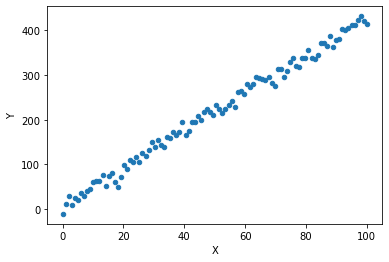

In [10]:
mdff.plot(x='X', y='Y', kind='scatter')

That looks a straight line relationship in which y is related to x by `y = a + bx + err`, in which a is y-intercept, b is the slope, and 'err' represents 'error' or 'noise', that is, variablility in y that is unrelated to x. 

Now lets do a prettier plot using seaborn.

In [14]:
sns.set_theme() # set theme to seaborn's default


Just like `displot()` is the seaborn quick and easy way for plotting distributions of variables, `relplot()` is the Q&E way for plotting relationships among variables. 

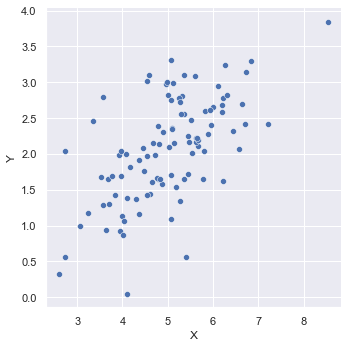

In [47]:
sns.relplot(data=mdff, x='X', y='Y')

As we noted above, the data seem to fall around a roughly straight line. We can easily fit and plot that line using the `seaborn.lmplot()` function, where the "lm" stands for "linear model" (of which a straight line is the simplest and default case).

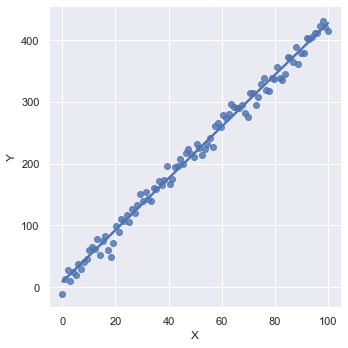

In [41]:
sns.lmplot(data=mdff, x='X', y='Y')

#### Read the second .csv file

In [42]:
mdff = pd.read_csv("datasets/008TutorialDataFile2.csv")

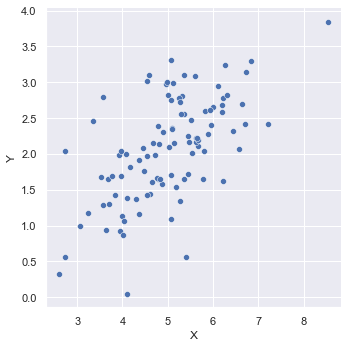

In [48]:
sns.relplot(data=mdff, x='X', y='Y')

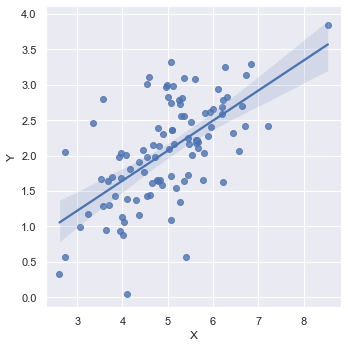

In [44]:
sns.lmplot(data=mdff, x='X', y='Y')

<AxesSubplot:xlabel='X', ylabel='Y'>

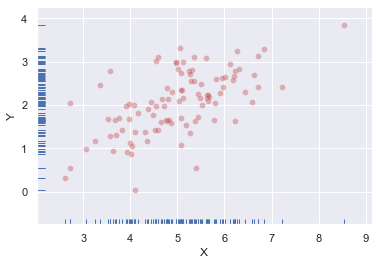

In [60]:
sns.scatterplot(data=mdff, x='X', y='Y', 
                 color='r', 
                 alpha=0.4)
sns.rugplot(data=mdff, x='X', y='Y')

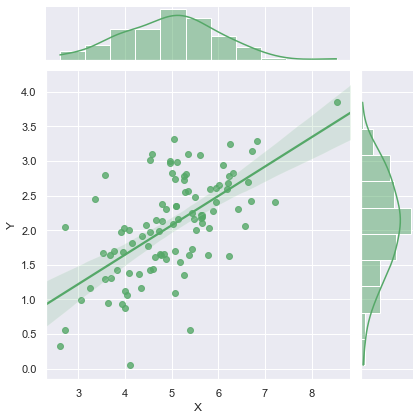

In [59]:
sns.jointplot(x="X", y="Y", data=mdff,
                  kind="reg", truncate=False,
                  color="g")

#### Read the third .csv file

In [61]:
mdff = pd.read_csv("datasets/008TutorialDataFile3.csv")

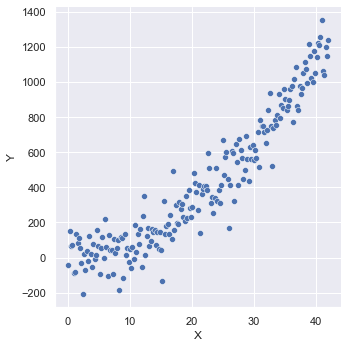

In [62]:
sns.relplot(data=mdff, x='X', y='Y')

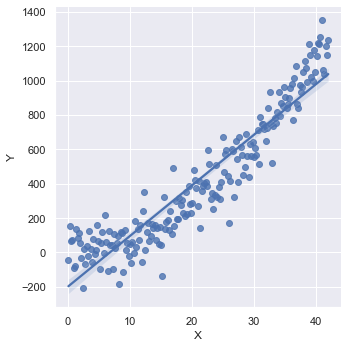

In [75]:
sns.lmplot(data=mdff, x='X', y='Y')

<AxesSubplot:xlabel='X', ylabel='Y'>

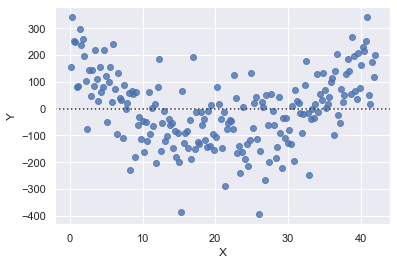

In [65]:
sns.residplot(data=mdff, x='X', y='Y')

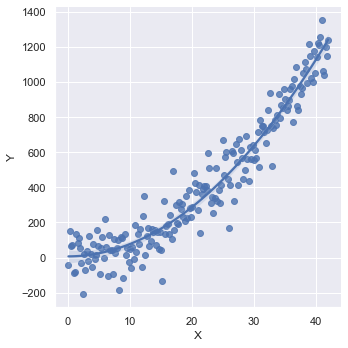

In [66]:
sns.lmplot(data=mdff, x='X', y='Y', order=2)

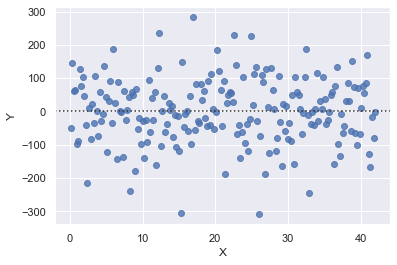

In [69]:
g = sns.residplot(data=mdff, x='X', y='Y', order=2)